<a href="https://colab.research.google.com/github/OHincapie/Grafos-Discretas/blob/main/FamiliaEspa%C3%B1olaGrafo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[0, 1, 4, 7, 8, 11, 14, 15, 18, 21]
Ingresa el sucesor que quieres encontrar de 1 a 24
7


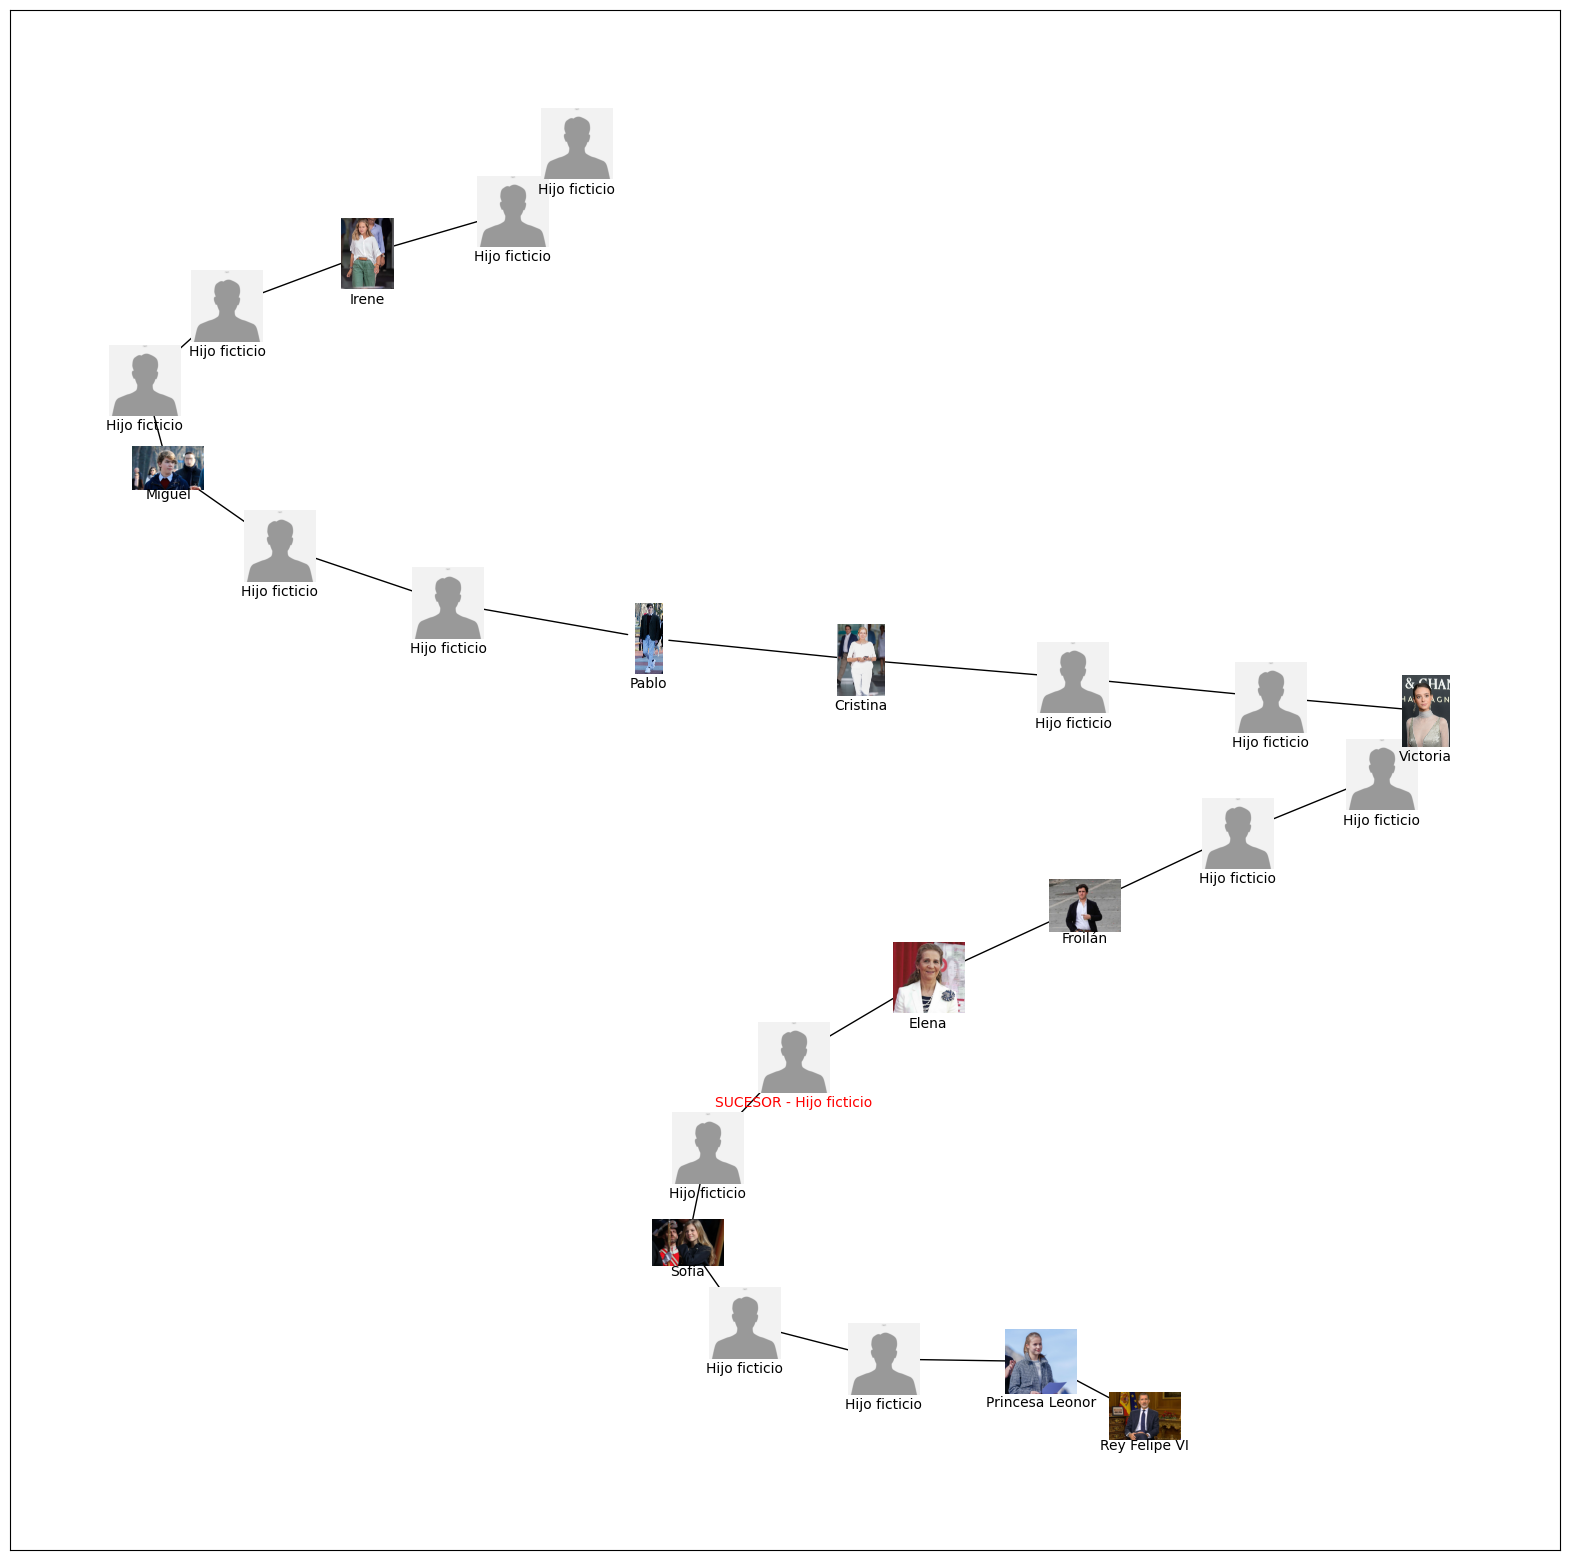

In [46]:
from google.colab import drive
import os
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import numpy as np
import networkx as nx

drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive")
dir = '/content/gdrive/MyDrive/FamiliaEspañola'
familia = []
posiciones_fijas = []
nombres = ['Rey Felipe VI', 'Princesa Leonor', 'Sofía', 'Elena', 'Froilán', 'Victoria', 'Cristina', 'Pablo', 'Miguel', 'Irene']
contenido= os.listdir(dir)

for persona in contenido:
  if persona != 'new.jpg':
    posicion = persona.split('.')[0]
    familia.append({
        'x': int(posicion) - 1,
        'image_path': f'{dir}/{persona}'
    })
  
familia = sorted(familia, key=lambda o:o['x'])

G=nx.Graph()

for index, familiar in enumerate(familia):
  if index != 0:
    G.add_edge(familiar['x'] - 1, familiar['x'])
  G.add_node(familiar['x'], image = mpimg.imread(familiar['image_path']))
  posiciones_fijas.append(familiar['x'] )
  if index != len(familia) -1 and familia[index + 1]['x'] - 1 != familiar['x']:
    G.add_node(familiar['x'] + 1, image = mpimg.imread(f'{dir}/new.jpg'))
    G.add_node(familiar['x'] + 2, image = mpimg.imread(f'{dir}/new.jpg'))
    G.add_edge(familiar['x'], familiar['x'] + 1)
    G.add_edge(familiar['x'] + 1, familiar['x'] + 2)
  elif index != len(familia) -1 and familia[index + 1]['x'] - 1 == familiar['x']:
    G.add_edge(familiar['x'], familia[index + 1]['x'])
  else:
    G.add_node(familiar['x'] + 1, image = mpimg.imread(f'{dir}/new.jpg'))
    G.add_node(familiar['x'] + 2, image = mpimg.imread(f'{dir}/new.jpg'))
    G.add_edge(familiar['x'], familiar['x'] + 1)
    G.add_edge(familiar['x'] + 1, familiar['x'] + 2)

print(posiciones_fijas)

pos = nx.spring_layout(G, seed=1734289230)
fig, ax = plt.subplots(figsize=(20, 20))  # Ajusta los valores de ancho y alto según tus necesidades

nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=15,
    min_target_margin=15,
)

tr_figure = ax.transData.transform
tr_axes = fig.transFigure.inverted().transform

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
icon_center = icon_size / 2.0

positionUser = int(input("Ingresa el sucesor que quieres encontrar de 1 a 24\n"))
while positionUser < 1 or positionUser > 24:
  print("Ingrese un valor valido:")
  positionUser = int(input("Ingresa el sucesor que quieres encontrar de 1 a 24\n"))

i = 0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
    if n in posiciones_fijas:
      label = nombres[i]
      i = i + 1
    else:
      label = "Hijo ficticio"
     # Add label below the image
    if n + 1 == positionUser:
      label = f'SUCESOR - {label}'
      text_color = "red"  # Color del texto
      a.text(0.5, -0.2, label, transform=a.transAxes, ha='center', color=text_color)
      continue
    a.text(0.5, -0.2, label, transform=a.transAxes, ha='center')
    
plt.show()